In [3]:
from transforms import LabelToBoundary, RandomFlip, RandomRotate, RandomRotate90, RandomContrast, RandomBrightness, RandomBrightnessContrast, Normalize
import matplotlib.pyplot as plt
import h5py
import numpy as np

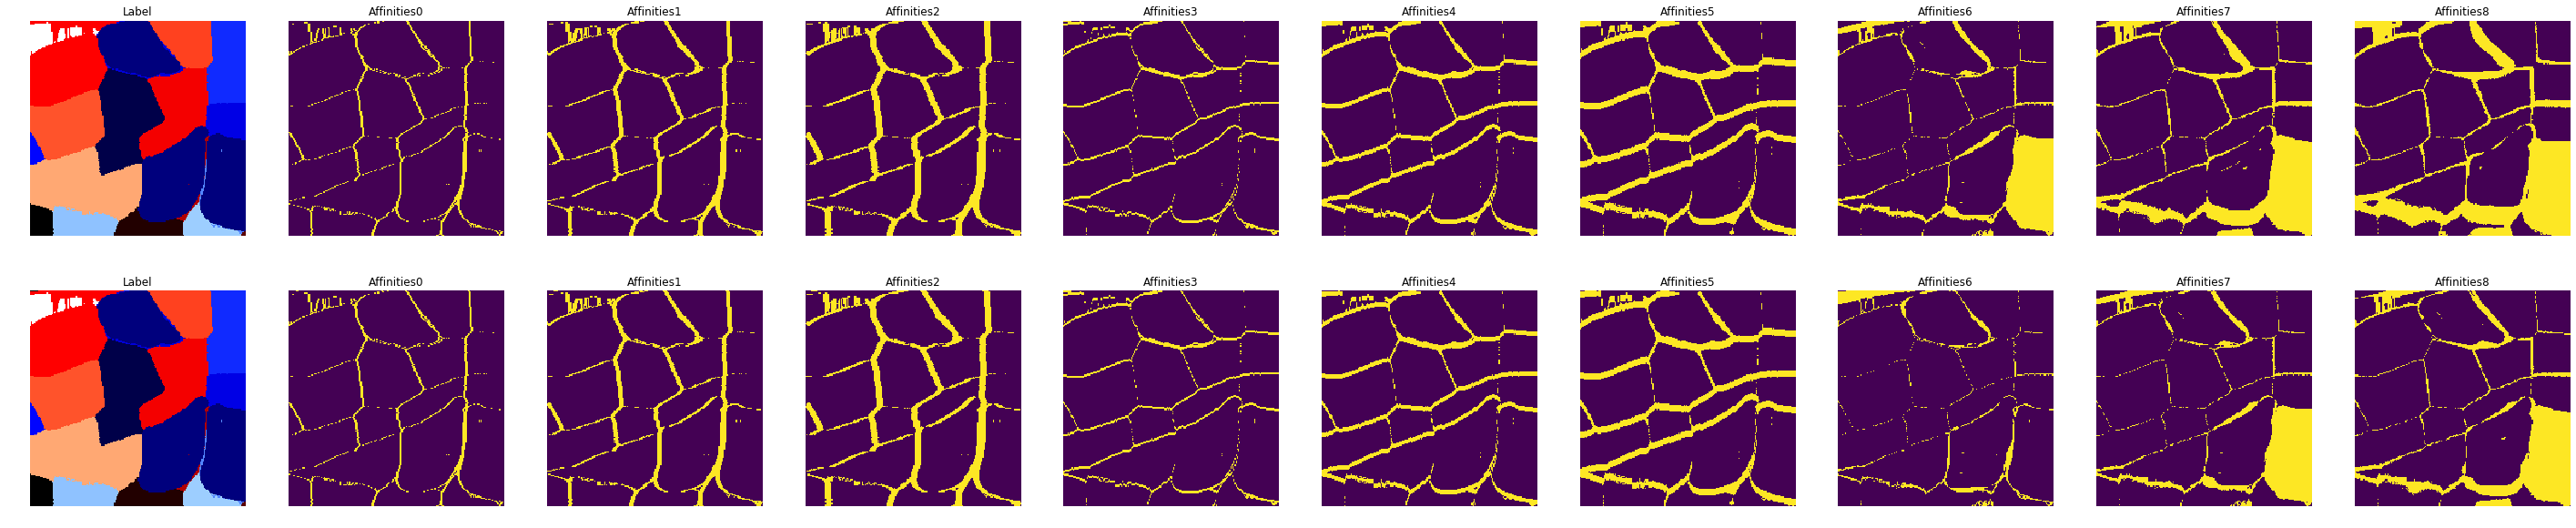

In [5]:
# LabelToBoundaryTransformer demo
path = '../resources/sample_patch.h5'

with h5py.File(path, 'r') as f:
    label = f['label'][...]
    t1 = LabelToBoundary(axes=(0, 1, 2), offsets=(2,4,6), z_scale=1)
    t2 = LabelToBoundary(axes=(0, 1, 2), offsets=(2,4,6), z_scale=2)
    label_transformed1 = t1(label)
    label_transformed2 = t2(label)
    
    fig, axes = plt.subplots(2, 10, figsize=(50,  10))
    ax = axes.ravel()

    # show label
    ax[0].set_title('Label')
    ax[0].imshow(label[40, ...], cmap='flag')
    ax[0].set_axis_off()

    for i in range(label_transformed1.shape[0]):        
        ax[i+1].set_title(f'Affinities{i}')
        ax[i+1].imshow(label_transformed1[i, 40, ...])
        ax[i+1].set_axis_off()
        
    # show label
    ax[10].set_title('Label')
    ax[10].imshow(label[40, ...], cmap='flag')
    ax[10].set_axis_off()

    for i in range(label_transformed2.shape[0]):        
        ax[i+11].set_title(f'Affinities{i}')
        ax[i+11].imshow(label_transformed2[i, 40, ...])
        ax[i+11].set_axis_off()

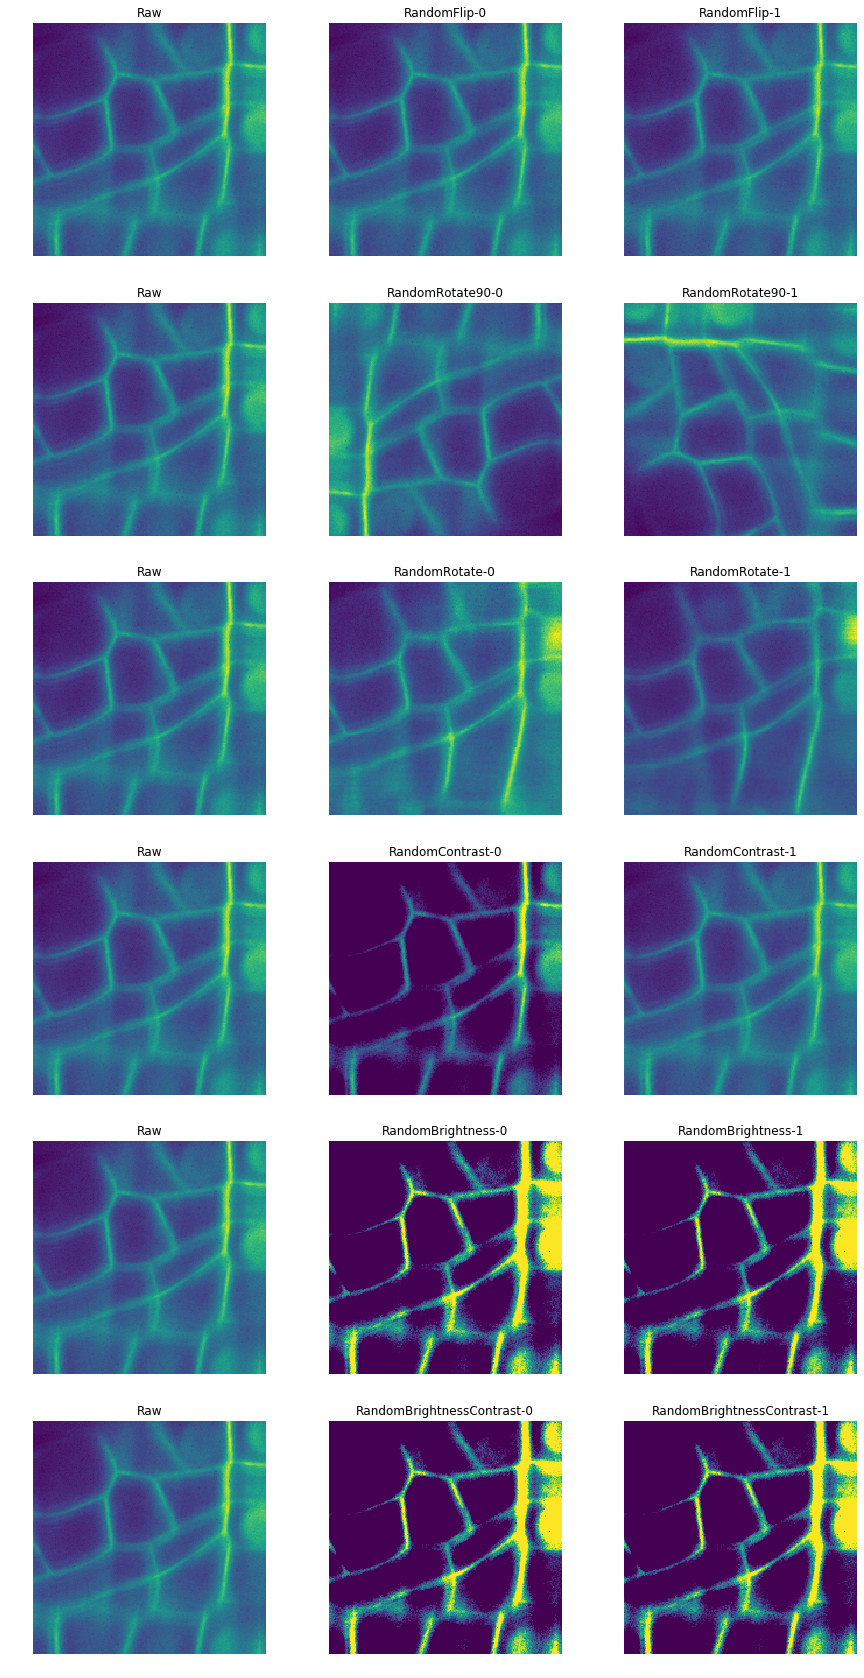

In [8]:
# demo some of the augmentations
rs = np.random.RandomState()
raw_transformers = [RandomFlip(rs), RandomRotate90(rs), RandomRotate(rs, angle_spectrum=20), RandomContrast(rs, contrast_range=(0.25, 0.75)), RandomBrightness(rs, brightness_range=0.1), RandomBrightnessContrast(rs)]

with h5py.File(path, 'r') as f:
    raw = f['raw'][...]
    mid_z = raw.shape[0] // 2
    raw = Normalize(np.mean(raw), np.std(raw))(raw)
    label = f['label'][...]
    
    # show transforms
    fig, axes = plt.subplots(len(raw_transformers), 3, figsize=(15, len(raw_transformers) * 5))
    ax = axes.ravel()
    
    for t, i in enumerate(range(0, 3 * len(raw_transformers), 3)):
        transformer = raw_transformers[t]
        ax[i].set_title('Raw')
        ax[i].imshow(raw[mid_z, ...])
        ax[i].set_axis_off()

        # show boundary for the 1st offset
        ax[i+1].set_title(f'{type(transformer).__name__}-0')
        aug = transformer(raw)
        ax[i+1].imshow(aug[mid_z, ...])
        ax[i+1].set_axis_off()

        # show boundary for the 4th offset
        ax[i+2].set_title(f'{type(transformer).__name__}-1')
        aug = transformer(raw)
        ax[i+2].imshow(aug[mid_z, ...])
        ax[i+2].set_axis_off()